<h1 align='center'>Automating ELT with GitHub actions</h1>

<h4 align='center'>Laura G. Funderburk </h4>



<h2 align='center'>Workshop structure</h2>

* Introductions
* **Section 1**: Introduction to ELT  (30 minutes)
* **Section 2**: Data extraction, wrangling and loading with SQL and DuckDB (30 minutes)
* *Short Break* (15 minutes)
* **Section 3**: Introduction to GitHub actions (30 minutes)
* **Section 4**: CI/CD of ETL Processes with GitHub Actions (15 minutes)
* **Section 5**: Regularly fetch and populate a db with ELT and GitHub actions (15 minutes)

* **Conclusion and Q&A** 

<h3 align='center'> Tools we'll be working with throughout this workshop</h3>

* **Database flavours**: DuckDB and Amazon Redshift
* **EDA tools**: Jupyter notebooks and JupySQL
* **Pipeline design and orchestration**: YAML files and Ploomber
* **Continuous Integration and Continuous Deployment (CI/CD)**: we will introduce how to set GitHub actions, and how to structure them. 
  
**You can modify the steps above to work with your preferred DB flavours and pipeline orchestration methods**


<h2 align='center'>About me</h2>

I work as a developer advocate for Ploomber. I have over three years of full time working experience as a data scientist in a variety of settings including the academic, private and the NGO sectors. I completed my B.Sc. Mathematics at SFU. In 2019, my Alma Mater awarded me a Terry Fox gold medal.

In my spare time, I train Brazilian Jiu-jitsu and I enjoy competing in regional tournaments. 

<h2 align='center'>Section 1: Introduction to ELT </h2>

<h3 align='center'>What is ELT?</h3>

ETL stands for **Extraction, Loading and Transformation**. 

* You extract raw data from various sources
* You load it in its natural state into a data warehouse or data lake
* You transform it as needed while in the target system

With ELT, all data cleansing, transformation, and enrichment occur within the data warehouse. You can interact with and transform the raw data as many times as needed.

<h3 align='center'> Why is ETL Important?</h3>

ETL processes are crucial for data analytics and business intelligence. They ensure that data is accurate, consistent, and available in a timely manner for analysis.


<h3 align='center'> ELT vs ETL</h3>

Extract, transform, and load (ETL) and extract, load, and transform (ELT) are two data-processing approaches for analytics.

The ETL approach uses a set of business rules to process data from several sources before centralized integration. 

The ELT approach loads data as it is and transforms it at a later stage, depending on the use case and analytics requirements. 


<h3 align='center'> Overview of JupySQL</h3>

JupySQL is a Jupyter extension designed to make SQL-based ETL processes seamless within Jupyter notebooks. With JupySQL, you can:

- Execute SQL queries directly from your Jupyter notebook.
- Integrate SQL results with Python code and libraries like Pandas.
- Visualize SQL query results using Jupyter's rich display capabilities.


<h3 align='center'>  Benefits of JupySQL</h3>

- **Simplicity**: No need to switch between SQL tools and Jupyter. Everything can be done in one place.
- **Flexibility**: Combine the power of SQL with Python's data manipulation capabilities.
- **Compatibility**: JupySQL is compatible with all major databases (e.g., PostgreSQL, MySQL, SQL Server), data warehouses (e.g., Snowflake, BigQuery, Redshift), and embedded engines (SQLite, and DuckDB).


<h3 align='center'> Overview of DuckDB</h3>

DuckDB is a free, open-source, embedded, in-process, relational, OnLine Analytical Processing (OLAP) DataBase Management System (DBMS). 

**DBMS features are running from within the application you’re trying to access from** instead of an external process your application connects to.

**OLAP** means the database is designed for data analysis.




<h3 align='center'> Overview of Amazon Redshift</h3>

AWS Redshift is a cloud-based petabyte-scale data warehouse service offered as one of Amazon's ecosystem of data solutions.

It is a relational database management system (RDBMS) and a type of OLAP database system.

<h3 align='center'> OLAP vs OLTP</h3>

$\Rightarrow$ **How is data is stored?**

OLTP databases commonly store data **by records** while ensuring all data associated with a record is stored close together in memory. They are also optimized for reading and writing rows efficiently.

OLAP databases are commonly oriented **by columns**, which means data is organized by columns. All data associated with a column is stored near one another in memory, and the database is optimised for reading and computing on the columns efficiently.

<h3 align='center'>  Installing and Loading JupySQL and Duckdb in Jupyter Notebooks </h3>

To get started with JupySQL and duckdb, you first need to install the modules. 

Ensure you have followed the steps in the [README](https://github.com/Vancouver-Datajam/automate-etl-github-actions/tree/main#setup-instructions) to install the required modules.

0. Fork repository
1. Clone your fork of the repository: 

```
git clone https://github.com/<your-github-id>/automate-etl-github-actions.git
cd automate-etl-github-actions
```

2. Create a virtual environment and install dependencies:

```
conda create -n automate-etl python=3.10
conda activate automate-etl
pip install poetry
poetry install
```

<h3 align='center'>Hands-on exercise</h3>

0. Fork repository
1. Clone your fork of the repository: 

```
git clone https://github.com/<your-github-id>/automate-etl-github-actions.git
cd automate-etl-github-actions
```


2. Create a virtual environment and install dependencies:

```
conda create -n automate-etl python=3.10
conda activate automate-etl
pip install poetry
poetry install
```

<h3 align='center'>  Configuring JupySQL's behaviour </h3>

By default, Poetry will create a `pyproject.toml` file. We can configure the functionality of JupySQL, for example, by transforming all SQL results into dataframe format by default.

We will use that configuration:

```bash
[tool.jupysql.SqlMagic]
displaycon = false
feedback = true
autopandas  = true
named_parameters = true
```


<h3 align='center'>  Data we will work with </h3>


```{important}
Source: UCI Machine Learning Repository

URL: https://archive-beta.ics.uci.edu/dataset/222/bank+marketing

Topic: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Citation

Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.
```

<h2 align='center'>Section 2: Data extraction, loading and wrangling working example</h2>

<h3 align='center'> Extracting data </h3>

We can set up a simple script to extract the data with Python. The data can be extracted via a URL which will download a `.zip` folder.

The key steps in extraction are:

0. Download the data via `urllib.request`
1. Unzip the content of the downloaded folder
2. Write the content of the folder into files


<h3 align='center'>  Data download and extraction</h3>

Sample functionality:

```python
import urllib.request
import zipfile

# Download the ZIP file
zip_file_path, _ = urllib.request.urlretrieve(<data-download-url>)
# Extract the ZIP file
with zipfile.ZipFile(<destination-folder>, "r") as zip_ref:
    zip_ref.extractall(self.output_folder)
```

To parse through each of the files, we will need to craft a bit more code. 

**Recommendation**: craft a `extractdata.py` script with your functions to extract and parse the data. Let's take a look at a sample script.

<h3 align='center'>Initializing the pipeline orchestration process</h3>

One practice I like to follow is to package my pipelines as soon as I start developing them. This increases my ability to upgrade their complexity, while still being able to evaluate and test that the smaller components work as expected. 

For this workshop, I will package my pipelines with Ploomber, which allows me to combine Python scripts, SQL scripts and even Jupyter notebooks as part of the pipeline.

At the core of Ploomber pipelines are `yaml` files. A sample pipeline can be found here:

The `pipeline.yaml` file:

```yaml
tasks:
  - source: etl/extractdata.py
    product:
      nb: products/extract-pipeline.ipynb
```

The Ploomber pipeline consists of tasks, whose sub entries contain the source (replace with your script or Jupyter notebook) and the products. Ploomber uses `papermill` - which allows you to parameterize, execute, and analyze notebooks, enabling you to leverage an open source framework to experiment with Jupyter notebooks. This, combined with the ability to include `.py` and `.sql` scripts, enables you to have flexibility in how you craft your pipelines. 

<h3 align='center'>Directory structure - before running the pipeline</h3>

```bash
pipeline/
├──pipeline.yaml
├──pyproject.toml
├──README.md
├──etl/
├──├── extractdata.py
├──products/
```

<h3 align='center'>Hands-on exercise</h3>

1. Create a `pipeline.yaml` file under `automate-elt-github/pipeline/`
2. Add the tasks:

```yaml
tasks:
  - source: etl/extractdata.py
    product:
      nb: products/extract-pipeline.ipynb
```


<h3 align='center'>Executing the pipeline</h3>

```bash
$ cd pipeline/
$ poetry run ploomber build
```

This yields:

```bash
Loading pipeline...
Executing: 100%|█████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.87s/cell]
Building task 'extractdata': 100%|█████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.34s/it]
name         Ran?      Elapsed (s)    Percentage
-----------  ------  -------------  ------------
extractdata  True          9.33752           100
```

<h3 align='center'>Directory structure - after running the pipeline</h3>

```
pipeline/
├──pipeline.yaml
├──pyproject.toml
├──README.md
├──etl/
├──├── extractdata.py
├──├── expanded_data/
├──├──├── file_1.csv
├──├──├── file_2.csv
├──├──├── ...
├──products/
├──├── extract-pipeline.ipynb
├──├── extract-pipeline.ipynb.metadata
```

<h2 align='center'>Goal: upgrade this pipeline to load the data onto a database, and further transform it using SQL </h2>


<h3 align='center'>  Loading the extracted data, then transforming on a DuckDB instance</h3>

We can now populate a database. We will use JupySQL to populate a database with the raw data, and further transform it. 

Here is a sample Jupyter notebook that joins the tables https://github.com/Vancouver-Datajam/automate-etl-github-actions/blob/main/pipeline/etl/wrangle-data.ipynb



We will then expand the pipeline and verify our results. 

```yaml
tasks:
  - source: etl/extractdata.py
    product:
      nb: products/extract-pipeline.ipynb
  - source: etl/wrangle-data.ipynb
    product:
      nb: products/wrangle-data-pipeline.ipynb
      data: etl/bank_data.duck.db
```



We run the pipeline

```bash
$ poetry run ploomber build

Executing:  56%|████████████████████                | 5/9 [00:03<00:02,  1.44cell/s]
Building task 'wrangle-data': 100%|███████████████████| 1/1 [00:03<00:00,  3.49s/it]
name          Ran?      Elapsed (s)    Percentage
------------  ------  -------------  ------------
wrangle-data  True          3.48937           100
extractdata   False         0                   0
```

In [1]:
# Loading in SQL extension
%reload_ext sql
# Initiating a DuckDB database named 'bank_data.duck.db' to run SQL queries
%sql duckdb:///../bank_data.duck.db

Found pyproject.toml from '/Users/macpro/Documents/GitHub/automate-etl-github-actions'

Settings changed:

Config,value
displaycon,False
feedback,True
autopandas,True
named_parameters,True


In [2]:
%sqlcmd tables

Name
account
card
client
disp
district
loan
order
trans
client_account_district
account_trans_order


<h3 align='center'> Data profiling </h3>


In [35]:
"""
client_account_district
account_trans_order
"""
%sqlcmd profile -t account_trans_order

,account_id,frequency,account_creation_date,trans_id,transaction_date,transaction_type,operation,transaction_amount,balance,order_id,bank_to,account_to,order_amount
count,1715140,1715140,1715140,1715140,1715140,1715140,1448066,1715140,1715140,1715140,1715140,1715140,1715140
unique,3758,3,1468,913010,2191,3,5,36147,494619,6471,13,6446,4412
top,nan,POPLATEK MESICNE,nan,nan,nan,VYDAJ,VYBER,nan,nan,nan,YZ,nan,nan
freq,nan,1566570,nan,nan,nan,1102627,634299,nan,nan,nan,139314,nan,nan
mean,3094.1083,nan,944777.5185,1331562.3713,965826.2771,nan,nan,5635.1784,38775.0580,33974.2133,nan,49244253.5220,3164.0519
std,2640.1109,nan,14117.7740,1214076.4248,13890.0655,nan,nan,9205.2246,21598.1211,3918.6348,nan,28917744.6902,2690.0998
min,1,nan,930101,1,930101,nan,nan,0.0,-35456.6,29401,nan,399,1.0
25%,1249.0000,nan,930728.0000,431994.0000,960126.0000,nan,nan,150.0000,22898.8000,31228.0000,nan,23890793.0000,1069.0000
50%,2493.0000,nan,940822.0000,859667.0000,970415.0000,nan,nan,1974.0000,33696.4000,33086.0000,nan,49547737.0000,2454.0000
75%,3751.0000,nan,960316.0000,2121552.0000,980228.0000,nan,nan,6388.0000,49760.4000,34928.0000,nan,73936581.0000,4545.0000


<h3 align='center'> Which district has the highest number of entrepreneurs per 1000 inhabitants? </h3>


In [ ]:
%%sql
SELECT DISTINCT district_name, no_of_entrepreneurs_per_1000_inhabitants
FROM client_account_district
ORDER BY no_of_entrepreneurs_per_1000_inhabitants DESC
LIMIT 1;

<h3 align='center'>Which region has the highest average salary?</h3>

In [8]:
%%sql --save average_salary --no-execute
SELECT region, AVG(average_salary) AS avg_salary
FROM client_account_district
GROUP BY region
ORDER BY avg_salary DESC

Skipping execution...

Generating CTE with stored snippets: 'average_salary'

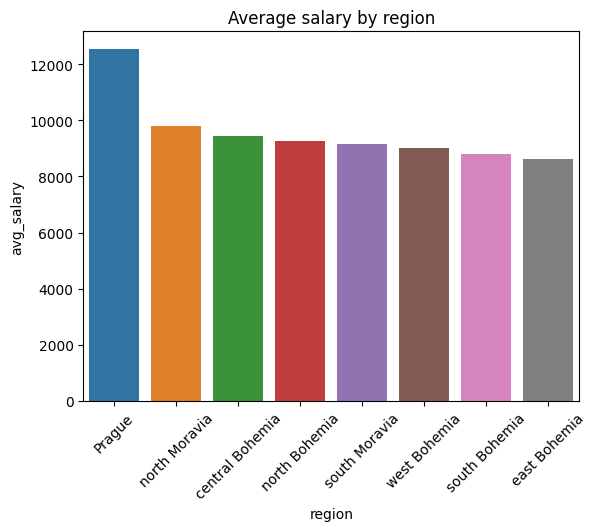

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_sal = %sql SELECT * FROM average_salary
sns.barplot(x=avg_sal['region'], y=avg_sal['avg_salary'])
plt.xticks(rotation=45)
plt.title("Average salary by region")
plt.show()

<h3 align='center'> How many clients are there in each region?</h3>

In [66]:
%%sql --save client_frequency --no-execute
SELECT region, COUNT(DISTINCT client_id) AS num_clients
FROM client_account_district
GROUP BY region;

Skipping execution...

Generating CTE with stored snippets: 'client_frequency'

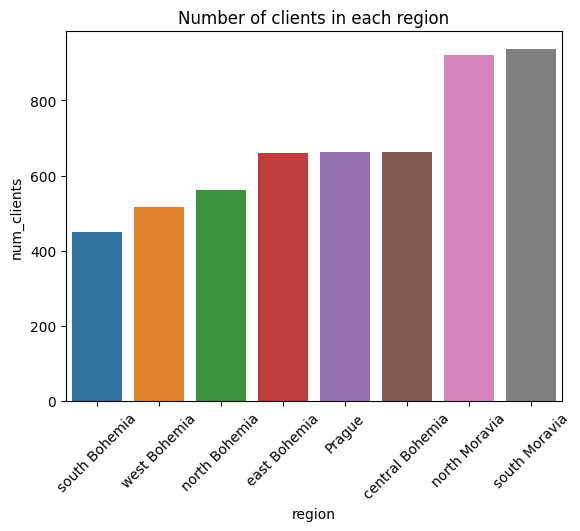

In [69]:
client_freq = %sql SELECT * FROM client_frequency
client_freq.sort_values(by='num_clients', inplace=True)
sns.barplot(x=client_freq['region'], y=client_freq['num_clients'])
plt.xticks(rotation=45)
plt.title("Number of clients in each region")
plt.show()

<h3 align='center'> Is there a correlation between the average salary of a district and the average transaction amount of clients from that district?</h3>

In [74]:
%%sql --save avg_dist_avg_transaction --no-execute
SELECT 
    cad.region,
    AVG(cad.average_salary) AS avg_district_salary,
    AVG(ato.transaction_amount) AS avg_transaction_amount
FROM client_account_district cad
JOIN account_trans_order ato ON cad.account_id = ato.account_id
GROUP BY cad.region
ORDER BY avg_district_salary, avg_transaction_amount;


Skipping execution...

In [75]:
avg_d_avg_tr = %sql SELECT * FROM avg_dist_avg_transaction
avg_d_avg_tr.head()

Generating CTE with stored snippets: 'avg_dist_avg_transaction'

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,region,avg_district_salary,avg_transaction_amount
0,east Bohemia,8625.323651,5684.243681
1,south Bohemia,8793.189384,5764.042859
2,west Bohemia,8986.326405,5393.660454
3,south Moravia,9139.420950,5304.807736
4,north Bohemia,9250.226137,5527.467883


Visualize:

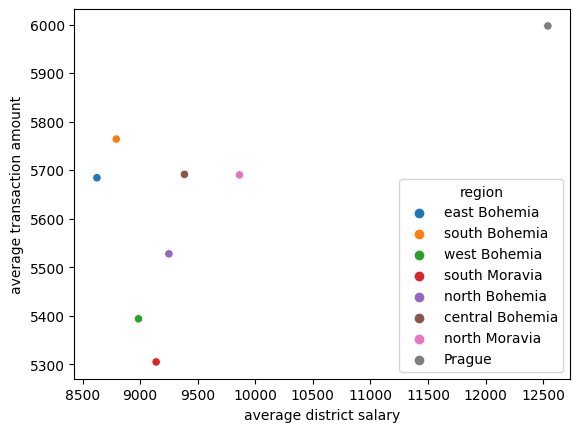

In [76]:
sns.scatterplot(data=avg_d_avg_tr, 
                x = "avg_district_salary", 
                y = "avg_transaction_amount",
               hue='region')
plt.xlabel("average district salary")
plt.ylabel("average transaction amount")
plt.show()

<h1 align='center'>Break </h1>

<h2 align='center'>Section 3: Introduction to GitHub actions</h2>

<h3 align='center'> What is GitHub Actions? </h3>
GitHub Actions is a CI/CD (Continuous Integration/Continuous Deployment) tool integrated directly into the GitHub platform. 

It allows you to automate, customize, and execute your software development workflows right in your repository. 

Think of it as a powerful tool in your toolkit that can handle tasks like building, testing, and deploying your code.

<h3 align='center'> Why GitHub Actions? </h3>

* **Integrated with GitHub:** No need for third-party platforms or integrations. Everything you need is right within GitHub.
* **Flexibility:** Define workflows using simple YAML files. You can create tasks for almost any action you can think of, from sending emails to deploying applications.
* **Matrix Builds:** Test your code on multiple versions of a language or various OS simultaneously.
* **Rich Ecosystem:** Leverage the vast marketplace of pre-built actions created by the community, or create your own.
* **Cost-Effective:** Generous free tier for public repositories, and competitive pricing for private ones.

<h3 align='center'> Core Concepts </h3>

* **Workflow:** A workflow is an automated procedure, defined by you. It can be triggered by various events like a push, pull request, or even on a schedule.
* **Job:** A workflow can have multiple jobs. Jobs run in parallel by default, but can be configured to depend on one another.
* **Step:** Each job has a series of steps. A step can be a set of commands to run, or an action from the marketplace.
* **Action:** Reusable pieces of code. You can create your own or use actions created by others in the GitHub community.

<h3 align='center'> Sample workflows </h3>

**Workflow triggered by a push:**

This workflow will be activated every time there's a push to the `main` branch. It's useful for continuous integration, ensuring that any new code pushed to the main branch passes all tests.

`.github/workflows/on-push.yml`

```yaml
name: On Push Workflow

on:
  push:
    branches:
      - main

jobs:
  build-and-test:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout code
      uses: actions/checkout@v2

    - name: Run tests
      run: |
        # Your commands to build and test your project
```

**Workflow triggered by a pull request:**

This workflow is activated every time a pull request is made to the `main` branch. It's useful for ensuring that the code in pull requests is valid before it's merged.

`.github/workflows/on-pull-request.yml`


```yaml
name: On Pull Request Workflow

on:
  pull_request:
    branches:
      - main

jobs:
  build-and-test:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout code
      uses: actions/checkout@v2

    - name: Run tests
      run: |
        # Your commands to build and test your project
```

**Workflow triggered on a schedule:**

This workflow runs at a scheduled time, for example, every day at 2 AM. It's useful for routine tasks like daily builds or regular data updates.

`.github/workflows/scheduled.yml`



```yaml
name: Scheduled Workflow

on:
  schedule:
    - cron: '0 2 * * *'  # This means 2 AM every day

jobs:
  routine-task:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout code
      uses: actions/checkout@v2

    - name: Execute routine task
      run: |
        # Your commands for the routine task
```


<h2 align='center'>Section 4: CI/CD of ETL Processes with GitHub Actions </h2>


talk about test

<h2 align='center'>Section 5: Regularly fetch and populate a data with ELT and GitHub actions </h2>


```yaml
name: Routine Data Fetch and Push to Redshift

on:
  schedule:
    - cron: '0 2 * * *'  # This means 2 AM every day

jobs:
  fetch-and-push:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout code
      uses: actions/checkout@v2

    - name: Set up Python 3.10
      uses: actions/setup-python@v2
      with:
        python-version: 3.10

    - name: Install Poetry using pip
      run: |
        python -m pip install poetry

    - name: Install dependencies using Poetry
      run: |
        poetry install

    - name: Run Ploomber pipeline to fetch and push data to Redshift
      env:
        REDSHIFT_USER: ${{ secrets.REDSHIFT_USER }}
        REDSHIFT_PASS: ${{ secrets.REDSHIFT_PASS }}
        REDSHIFT_HOST: ${{ secrets.REDSHIFT_HOST }}
        REDSHIFT_PORT: ${{ secrets.REDSHIFT_PORT }}
        REDSHIFT_DB: ${{ secrets.REDSHIFT_DB }}
      run: |
        cd pipeline
        poetry run ploomber build

```